# Import and clean up of the control variables for my model

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import sidetable

In [2]:
##set a working directory
user = os.path.expanduser('~')
display(user)

os.makedirs(f'{user}/Desktop/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'thesis/control variables/')

'/Users/NatStrom'

In [3]:
#import the ingester extension functions
from ingester3.scratch import cache_manager
cache_manager()
from ingester3.extensions import *

import viewser
from viewser import Queryset, Column
from views_transformation_library import utilities

import ingester3
from ingester3.Country import Country

In [4]:
def nullcounts(ser):
    return ser.isnull().sum()

def custom_describe(frame, func=[nullcounts, 'sum', 'mean', 'median', 'max'],
                    numeric_only=True, **kwargs):
    if numeric_only:
        frame = frame.select_dtypes(include=np.number)
    return frame.agg(func, **kwargs)

## 1. WDI indicator

In [5]:
data_pop_dnst = pd.read_csv('API_EN.POP.DNST_DS2_en_csv_v2_5358697.csv',skiprows = 4)
data_xpd_gdp = pd.read_csv('API_SH.XPD.CHEX.GD.ZS_DS2_en_csv_v2_5358500.csv',skiprows = 4)
data_urban = pd.read_csv('API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_5359159.csv',skiprows = 4)

In [6]:
display(data_pop_dnst.columns)
display(data_xpd_gdp.columns)
display(data_urban.columns)
display(data_pop_dnst)
display(data_xpd_gdp)
display(data_urban)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,310.061111,314.900000,319.305556,323.211111,326.566667,...,571.555556,575.522222,579.205556,582.633333,585.772222,588.677778,591.344444,592.138889,NaN,NaN
1,Africa Eastern and Southern,AFE,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,9.207577,9.459187,9.719622,9.992443,10.276307,...,38.254417,39.316097,40.417819,41.520460,42.623142,43.768966,44.946811,46.150692,NaN,NaN
2,Afghanistan,AFG,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,13.477056,13.751356,14.040239,14.343888,14.665298,...,48.359028,50.160542,51.750915,53.104284,54.648541,56.248231,57.908252,59.752281,NaN,NaN
3,Africa Western and Central,AFW,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,10.978074,11.213633,11.459305,11.712711,11.975377,...,42.804993,43.982443,45.180225,46.405991,47.661860,48.934069,50.222984,51.536679,NaN,NaN
4,Angola,AGO,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,4.364589,4.428812,4.491720,4.550573,4.601413,...,20.972970,21.760116,22.561740,23.385535,24.230872,25.085051,25.951382,26.813577,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,10.695055,10.897184,11.099489,11.314664,11.548569,...,51.108968,52.566062,54.011677,55.446336,56.886545,58.318679,59.750916,61.147501,NaN,NaN
263,South Africa,ZAF,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,14.005114,14.428553,14.872940,15.335298,15.816793,...,44.410238,45.115821,46.061301,46.511202,46.691679,47.267420,47.883549,48.472848,NaN,NaN
264,Zambia,ZMB,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,4.330770,4.470637,4.615856,4.765687,4.920733,...,20.493921,21.170305,21.856939,22.555807,23.269151,23.992646,24.725214,25.461353,NaN,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.565593,6.151985,6.482030,6.390371,6.317424,6.323236,6.272034,NaN,NaN,NaN
2,Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.805941,9.528871,10.105348,11.818562,12.620817,14.126743,13.242202,NaN,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.619163,3.606540,3.832625,3.811249,3.789624,3.383501,3.366086,NaN,NaN,NaN
4,Angola,AGO,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.732828,2.434129,2.605795,2.713149,2.791503,2.540102,2.533360,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.960832,4.841805,4.252858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.855524,8.550915,8.790190,8.821429,8.722624,8.858297,9.109355,NaN,NaN,NaN
264,Zambia,ZMB,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.690910,3.829242,4.435102,4.477207,4.376977,5.032715,5.312203,NaN,NaN,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,NaN
1,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.563810,14.811410,15.069249,15.347976,15.640195,15.941282,...,33.476208,33.936959,34.425581,34.894750,35.358898,35.847596,36.336258,36.828301,37.323697,NaN
2,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401000,8.684000,8.976000,9.276000,9.586000,9.904000,...,24.373000,24.587000,24.803000,25.020000,25.250000,25.495000,25.754000,26.026000,26.314000,NaN
3,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.705391,15.090123,15.484076,15.897592,16.329208,16.778650,...,43.554094,44.180175,44.805863,45.425066,46.039478,46.649426,47.255413,47.857831,48.454806,NaN
4,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,10.435000,10.798000,11.204000,11.624000,12.058000,12.504000,...,62.002000,62.731000,63.446000,64.149000,64.839000,65.514000,66.177000,66.825000,67.460000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Urban population (% of total population),SP.URB.TOTL.IN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Urban population (% of total population),SP.URB.TOTL.IN.ZS,9.100000,9.459000,9.831000,10.216000,10.614000,11.026000,...,33.559000,34.165000,34.777000,35.394000,36.016000,36.642000,37.273000,37.908000,38.546000,NaN
263,South Africa,ZAF,Urban population (% of total population),SP.URB.TOTL.IN.ZS,46.619000,46.793000,46.906000,47.020000,47.134000,47.248000,...,63.793000,64.312000,64.828000,65.341000,65.850000,66.355000,66.856000,67.354000,67.847000,NaN
264,Zambia,ZMB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,18.145000,18.951000,19.785000,20.712000,22.015000,23.372000,...,40.865000,41.382000,41.907000,42.438000,42.976000,43.521000,44.072000,44.629000,45.192000,NaN


In [7]:
#stack, filter and rename the columns
##rename
data_pop_dnst = data_pop_dnst.rename(columns= {'Country Code':'iso'})
data_xpd_gdp = data_xpd_gdp.rename(columns= {'Country Code':'iso'})
data_urban = data_urban.rename(columns= {'Country Code':'iso'})
##filter the needed columns
data_pop_dnst = data_pop_dnst.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 66'])
data_xpd_gdp = data_xpd_gdp.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 66'])
data_urban = data_urban.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 66'])
##stack the individual year columns
data_pop_dnst = data_pop_dnst.melt(id_vars='iso',var_name='year_id',value_name='pop_dens_value')
data_xpd_gdp = data_xpd_gdp.melt(id_vars='iso',var_name='year_id',value_name='health_xpd_value')
data_urban = data_urban.melt(id_vars='iso',var_name='year_id',value_name='urban_value')

display(data_pop_dnst)
display(data_xpd_gdp)
display(data_urban)

,iso,year_id,pop_dens_value
0,ABW,1960,NaN
1,AFE,1960,NaN
2,AFG,1960,NaN
3,AFW,1960,NaN
4,AGO,1960,NaN
...,...,...,...
16487,XKX,2021,NaN
16488,YEM,2021,NaN
16489,ZAF,2021,NaN
16490,ZMB,2021,NaN


,iso,year_id,health_xpd_value
0,ABW,1960,NaN
1,AFE,1960,NaN
2,AFG,1960,NaN
3,AFW,1960,NaN
4,AGO,1960,NaN
...,...,...,...
16487,XKX,2021,NaN
16488,YEM,2021,NaN
16489,ZAF,2021,NaN
16490,ZMB,2021,NaN


,iso,year_id,urban_value
0,ABW,1960,50.776000
1,AFE,1960,14.563810
2,AFG,1960,8.401000
3,AFW,1960,14.705391
4,AGO,1960,10.435000
...,...,...,...
16487,XKX,2021,NaN
16488,YEM,2021,38.546000
16489,ZAF,2021,67.847000
16490,ZMB,2021,45.192000


In [8]:
#merge them together
data_wdi = pd.merge(data_urban,data_pop_dnst, how="outer", on=["iso", "year_id"])
data_wdi = pd.merge(data_wdi,data_xpd_gdp, how="outer", on=["iso", "year_id"])
display(data_wdi)

,iso,year_id,urban_value,pop_dens_value,health_xpd_value
0,ABW,1960,50.776000,NaN,NaN
1,AFE,1960,14.563810,NaN,NaN
2,AFG,1960,8.401000,NaN,NaN
3,AFW,1960,14.705391,NaN,NaN
4,AGO,1960,10.435000,NaN,NaN
...,...,...,...,...,...
16487,XKX,2021,NaN,NaN,NaN
16488,YEM,2021,38.546000,NaN,NaN
16489,ZAF,2021,67.847000,NaN,NaN
16490,ZMB,2021,45.192000,NaN,NaN


In [9]:
display(data_wdi.dtypes)
data_wdi['year_id'] = data_wdi['year_id'].astype(str).astype(int)

iso                  object
year_id              object
urban_value         float64
pop_dens_value      float64
health_xpd_value    float64
dtype: object

In [10]:
## only years from 1980 onwards
data_wdi = data_wdi.loc[data_wdi['year_id'] >= 1980]

In [11]:
#create c_ids
data_wdi = pd.DataFrame.cy.soft_validate_iso_year(data_wdi, iso_col='iso', year_col = 'year_id', at_month = 12)
inspect = data_wdi.query("valid_id == False")
print('countries with invalid id below')
display(inspect)

data_wdi = pd.DataFrame.cy.from_iso_year(data_wdi[data_wdi['valid_id']==True], iso_col = 'iso', year_col = 'year_id', at_month = 12)
data_wdi = data_wdi.c.db_id()
#inspect = data_DALY.loc[data_DALY.cy_id.isna()]
print('countries with cy_id na below')
display(inspect)

countries with invalid id below


,iso,year_id,urban_value,pop_dens_value,health_xpd_value,valid_id
5320,ABW,1980,50.472000,345.927778,NaN,False
5321,AFE,1980,20.876112,15.850537,NaN,False
5323,AFW,1980,24.585094,17.447430,NaN,False
5327,ARB,1980,44.483792,12.321074,NaN,False
5330,ARM,1980,66.050000,110.120232,NaN,False
...,...,...,...,...,...,...
16475,UMC,2021,68.375369,NaN,NaN,False
16481,VGB,2021,48.920000,NaN,NaN,False
16482,VIR,2021,96.040000,NaN,NaN,False
16485,WLD,2021,56.477541,NaN,NaN,False


countries with cy_id na below


,iso,year_id,urban_value,pop_dens_value,health_xpd_value,valid_id
5320,ABW,1980,50.472000,345.927778,NaN,False
5321,AFE,1980,20.876112,15.850537,NaN,False
5323,AFW,1980,24.585094,17.447430,NaN,False
5327,ARB,1980,44.483792,12.321074,NaN,False
5330,ARM,1980,66.050000,110.120232,NaN,False
...,...,...,...,...,...,...
16475,UMC,2021,68.375369,NaN,NaN,False
16481,VGB,2021,48.920000,NaN,NaN,False
16482,VIR,2021,96.040000,NaN,NaN,False
16485,WLD,2021,56.477541,NaN,NaN,False


In [12]:
#group by country-year & only filter c_ids for Eastern SSa
data_wdi = data_wdi.query('c_id == 55 or c_id == 56 or c_id ==57 or c_id == 120 and c_id == 155 or c_id == 157 or c_id == 158 or c_id == 159 or c_id == 162 or c_id == 172 or c_id ==191 or c_id ==235 or c_id ==237 or c_id ==246')
data_wdi = data_wdi.groupby(['c_id','year_id']).sum().reset_index()
display(data_wdi)

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_864/3491736222.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_wdi = data_wdi.groupby(['c_id','year_id']).sum().reset_index()


,c_id,year_id,urban_value,pop_dens_value,health_xpd_value,valid_id
0,55,1980,72.096,13.982787,0.000000,1
1,55,1981,73.028,14.724590,0.000000,1
2,55,1982,73.942,15.319672,0.000000,1
3,55,1983,74.504,15.863934,0.000000,1
4,55,1984,74.715,16.486454,0.000000,1
...,...,...,...,...,...,...
413,246,2017,19.346,16.866150,8.237014,1
414,246,2018,19.615,16.450127,6.275667,1
415,246,2019,19.899,16.532948,6.042139,1
416,246,2020,20.199,16.783864,0.000000,1


In [13]:
#test for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_wdi.columns:
    pct_missing= np.mean(data_wdi[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,c_id,0.0
1,year_id,0.0
2,urban_value,0.0
3,pop_dens_value,0.0
4,health_xpd_value,0.0
5,valid_id,0.0


In [14]:
custom_describe(data_wdi)

,c_id,year_id,urban_value,pop_dens_value,health_xpd_value,valid_id
nullcounts,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
sum,64536.000000,836568.000000,12955.782000,28385.656577,976.075935,418.0
mean,154.392344,2001.358852,30.994694,67.908269,2.335110,1.0
median,159.000000,2002.000000,27.928500,33.067921,0.000000,1.0
max,246.000000,2021.000000,78.217000,433.189683,10.475839,1.0


In [15]:
display(data_wdi.stb.freq(['c_id','year_id'],value='urban_value'))
display(data_wdi.stb.freq(['c_id','year_id'],value='pop_dens_value'))
display(data_wdi.stb.freq(['c_id','year_id'],value='health_xpd_value'))

,c_id,year_id,urban_value,percent,cumulative_urban_value,cumulative_percent
0,55,2021,78.217,0.603723,78.217,0.603723
1,55,2020,78.062,0.602526,156.279,1.206249
2,55,2019,77.915,0.601392,234.194,1.807641
3,55,2018,77.777,0.600327,311.971,2.407967
4,55,2017,77.648,0.599331,389.619,3.007298
...,...,...,...,...,...,...
413,235,1984,8.805,0.067962,12923.797,99.753122
414,235,1983,8.470,0.065376,12932.267,99.818498
415,235,1982,8.147,0.062883,12940.414,99.881381
416,235,1981,7.834,0.060467,12948.248,99.941848


,c_id,year_id,pop_dens_value,percent,cumulative_pop_dens_value,cumulative_percent
0,159,2020,433.189683,1.526087,433.189683,1.526087
1,159,2019,425.032778,1.497351,858.222461,3.023437
2,159,2018,417.148307,1.469574,1275.370768,4.493011
3,159,2017,409.276733,1.441843,1684.647501,5.934855
4,159,2016,400.984417,1.412630,2085.631918,7.347485
...,...,...,...,...,...,...
401,157,1984,8.727683,0.030747,28353.372303,99.886266
402,157,1983,8.462678,0.029813,28361.834980,99.916079
403,157,1982,8.193301,0.028864,28370.028281,99.944943
404,157,1981,7.933226,0.027948,28377.961507,99.972891


,c_id,year_id,health_xpd_value,percent,cumulative_health_xpd_value,cumulative_percent
0,158,2010,10.475839,1.073261,10.475839,1.073261
1,158,2018,8.680062,0.889281,19.155901,1.962542
2,246,2017,8.237014,0.843891,27.392915,2.806433
3,158,2014,8.133525,0.833288,35.526440,3.639721
4,162,2018,8.091857,0.829019,43.618297,4.468740
...,...,...,...,...,...,...
188,55,2016,2.727400,0.279425,967.290253,99.099898
189,55,2017,2.464768,0.252518,969.755021,99.352416
190,55,2018,2.262542,0.231800,972.017564,99.584216
191,162,2000,2.260103,0.231550,974.277667,99.815766


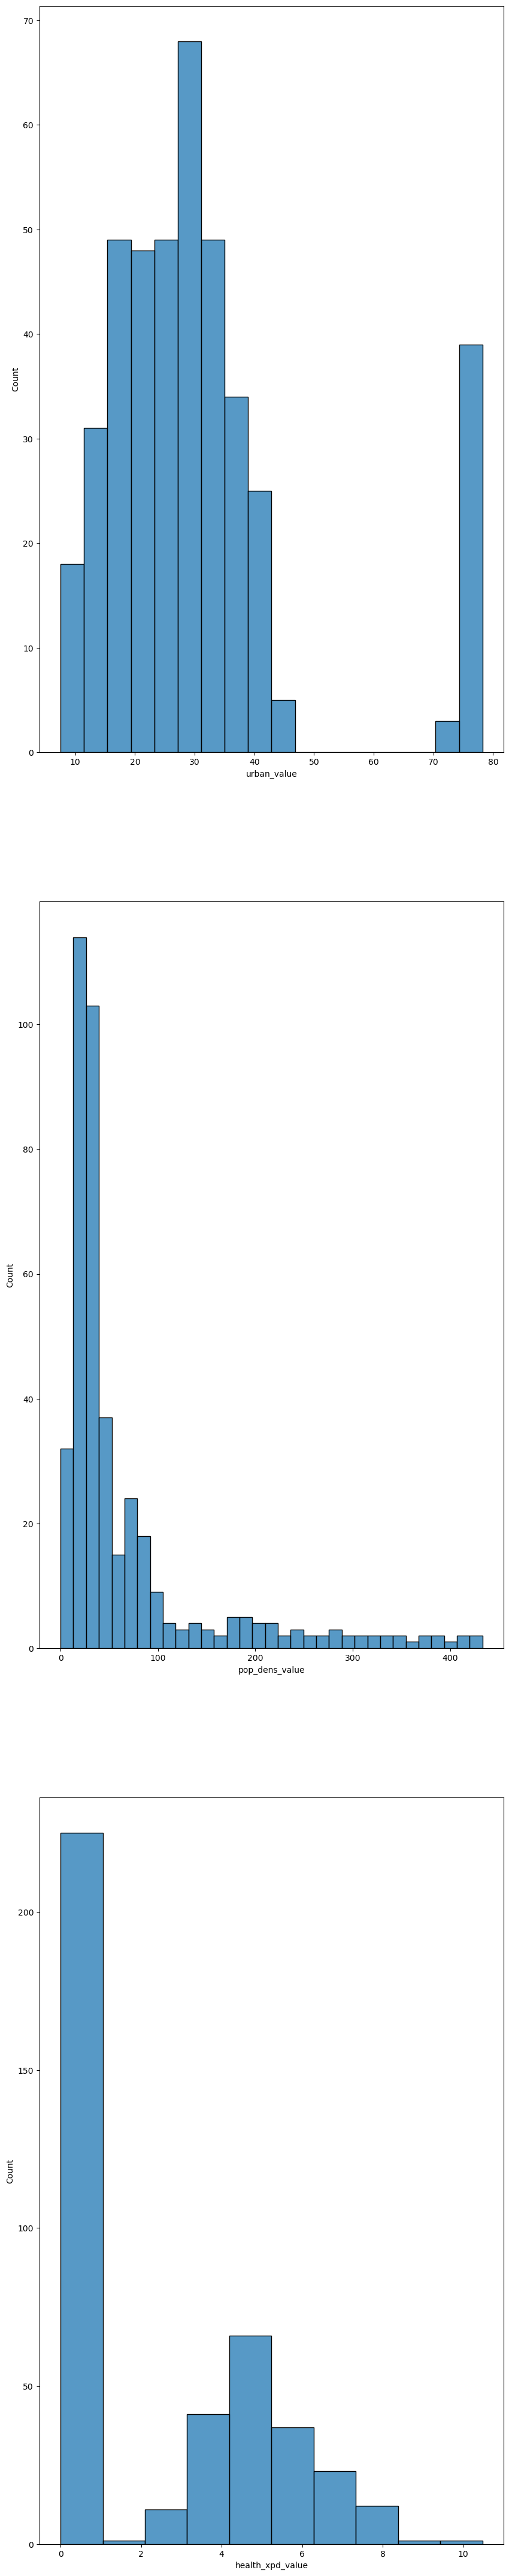

In [16]:
#get a histogram
#create histograms for all mean variables
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_wdi['urban_value'],ax=axes[0])
sns.histplot(data_wdi['pop_dens_value'],ax=axes[1])
sns.histplot(data_wdi['health_xpd_value'],ax=axes[2])
plt.savefig('wdi1.png')

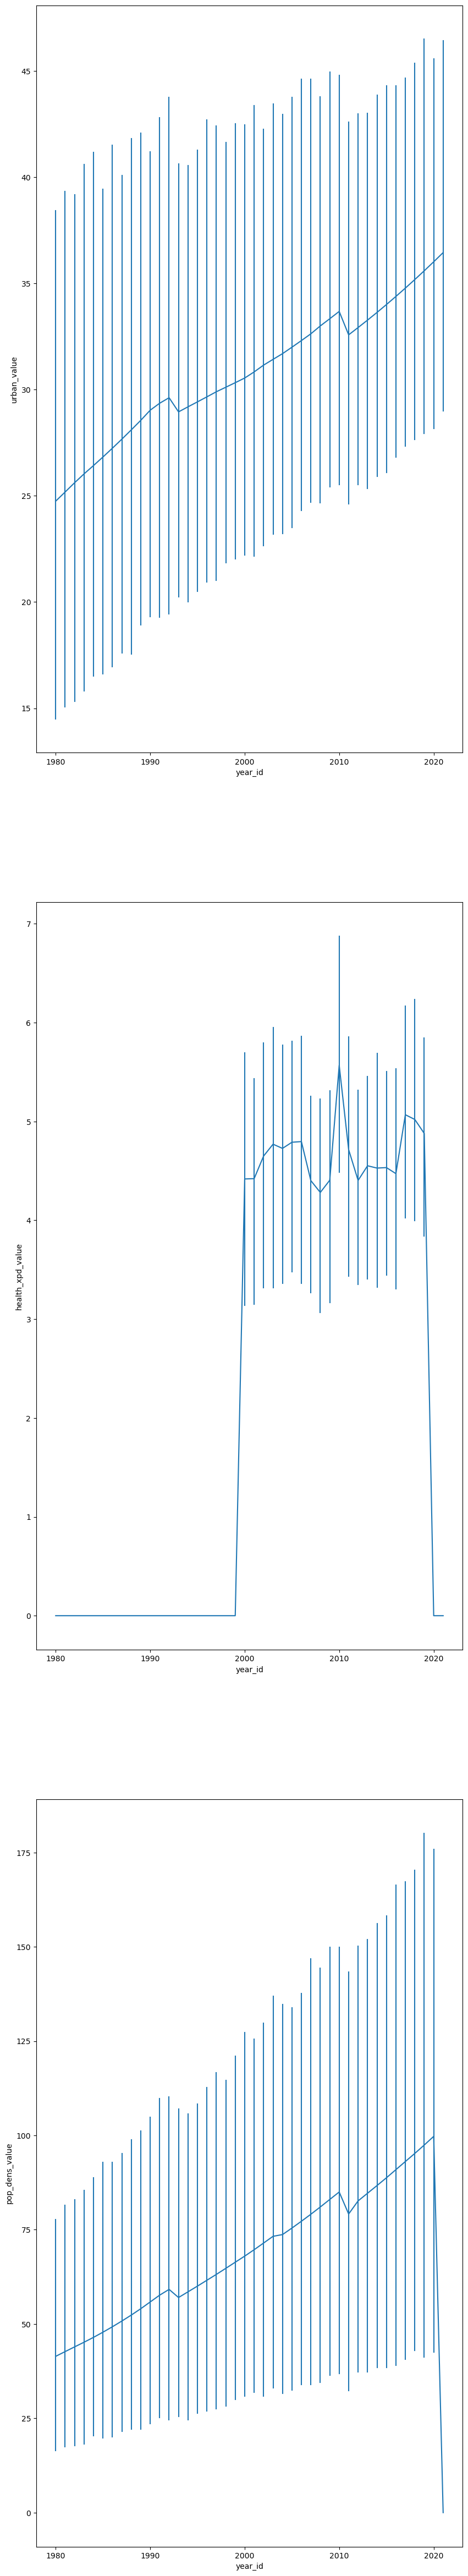

In [17]:
#create trendlines
figure, axes = plt.subplots(3,1,figsize=(10,60))

sns.lineplot(x='year_id',y='urban_value',data=data_wdi,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='health_xpd_value',data=data_wdi,err_style='bars',ax=axes[1])
sns.lineplot(x='year_id',y='pop_dens_value',data=data_wdi,err_style='bars',ax=axes[2])

plt.savefig('wdi2.png')

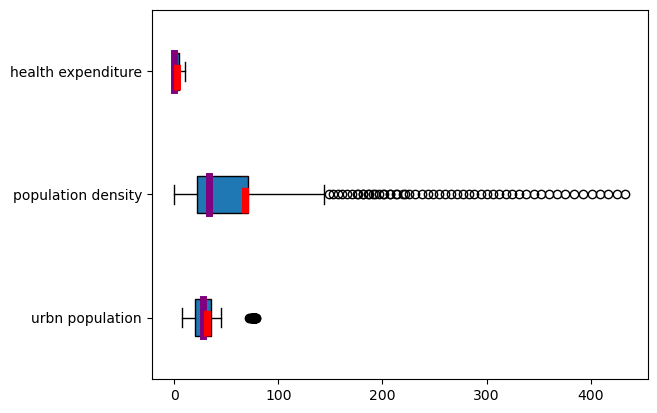

In [18]:
fig, ax = plt.subplots()
ax.boxplot((data_wdi['urban_value'],data_wdi['pop_dens_value'],data_wdi['health_xpd_value']), vert=False, showmeans=True, meanline=True,
           labels=('urbn population', 'population density', 'health expenditure'), patch_artist=True,
           medianprops={'linewidth': 5, 'color': 'purple'},
           meanprops={'linewidth': 5, 'color': 'red'})
plt.show()

In [19]:
#save to csv
data_wdi.to_csv('data_wdi.csv')

## 2. Development assistance to health

In [20]:
#load data (already cleaned up)
data_dah = pd.read_csv('DAH.csv')
display(data_dah)

,Unnamed: 0,country,year_id,iso,ihme_dah_elim_ch,ihme_dah_prelim_est,ihme_dah_total_aid,ihme_dah_rmh_aid,ihme_dah_nch_aid,ihme_dah_hiv_aid,ihme_dah_mal_aid,ihme_dah_tb_aid,ihme_dah_ncd_aid,ihme_dah_oid_aid,ihme_dah_unalloc_aid,ihme_dah_other_aid
0,0,Afghanistan,1990,AFG,0,0,64005.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,0.0,63812.0
1,1,Afghanistan,1991,AFG,0,0,44222.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44131.0
2,2,Afghanistan,1992,AFG,1,0,18503.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17253.0
3,3,Afghanistan,1993,AFG,1,0,13531.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13521.0
4,4,Afghanistan,1994,AFG,1,0,2105.0,155.0,340.0,2.0,0.0,0.0,4.0,118.0,0.0,1353.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,4512,Zimbabwe,2014,ZWE,87,0,366808.0,55318.0,46085.0,212254.0,34890.0,8450.0,573.0,799.0,0.0,6066.0
4513,4513,Zimbabwe,2015,ZWE,80,0,491662.0,53583.0,86006.0,294420.0,33059.0,13915.0,1239.0,1720.0,0.0,4014.0
4514,4514,Zimbabwe,2016,ZWE,89,0,385735.0,34939.0,52061.0,223305.0,38019.0,14030.0,524.0,1343.0,0.0,19902.0
4515,4515,Zimbabwe,2017,ZWE,75,27,436510.0,25122.0,122226.0,206333.0,39998.0,21187.0,2762.0,1907.0,0.0,14835.0


In [21]:
#add c_id
data_dah = pd.DataFrame.cy.soft_validate_iso_year(data_dah, iso_col='iso', year_col = 'year_id', at_month = 12)
inspect = data_dah.query("valid_id == False")
print('countries with invalid id below')
display(inspect)

data_dah = pd.DataFrame.cy.from_iso_year(data_dah[data_dah['valid_id']==True], iso_col = 'iso', year_col = 'year_id', at_month = 12)
data_dah = data_dah.c.db_id()
#inspect = data_DALY.loc[data_DALY.cy_id.isna()]
print('countries with cy_id na below')
display(inspect)

countries with invalid id below


,Unnamed: 0,country,year_id,iso,ihme_dah_elim_ch,ihme_dah_prelim_est,ihme_dah_total_aid,ihme_dah_rmh_aid,ihme_dah_nch_aid,ihme_dah_hiv_aid,ihme_dah_mal_aid,ihme_dah_tb_aid,ihme_dah_ncd_aid,ihme_dah_oid_aid,ihme_dah_unalloc_aid,ihme_dah_other_aid,valid_id
116,116,Anguilla,1992,AIA,0,0,1484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1484.0,False
117,117,Anguilla,1993,AIA,0,0,537.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,537.0,False
118,118,Anguilla,1994,AIA,0,0,294.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,False
119,119,Anguilla,1995,AIA,0,0,167.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,False
120,120,Anguilla,1998,AIA,0,0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,4425,Wallis and Futuna Islands,2014,WLF,4,0,918.0,1.0,744.0,0.0,0.0,0.0,18.0,88.0,0.0,49.0,False
4426,4426,Wallis and Futuna Islands,2015,WLF,3,0,280.0,115.0,85.0,0.0,0.0,0.0,26.0,3.0,0.0,41.0,False
4427,4427,Wallis and Futuna Islands,2016,WLF,2,0,7270.0,129.0,3049.0,0.0,0.0,0.0,49.0,0.0,0.0,3622.0,False
4428,4428,Wallis and Futuna Islands,2017,WLF,3,3,2490.0,90.0,1172.0,0.0,0.0,0.0,34.0,2.0,0.0,894.0,False


countries with cy_id na below


,Unnamed: 0,country,year_id,iso,ihme_dah_elim_ch,ihme_dah_prelim_est,ihme_dah_total_aid,ihme_dah_rmh_aid,ihme_dah_nch_aid,ihme_dah_hiv_aid,ihme_dah_mal_aid,ihme_dah_tb_aid,ihme_dah_ncd_aid,ihme_dah_oid_aid,ihme_dah_unalloc_aid,ihme_dah_other_aid,valid_id
116,116,Anguilla,1992,AIA,0,0,1484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1484.0,False
117,117,Anguilla,1993,AIA,0,0,537.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,537.0,False
118,118,Anguilla,1994,AIA,0,0,294.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,False
119,119,Anguilla,1995,AIA,0,0,167.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,False
120,120,Anguilla,1998,AIA,0,0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,4425,Wallis and Futuna Islands,2014,WLF,4,0,918.0,1.0,744.0,0.0,0.0,0.0,18.0,88.0,0.0,49.0,False
4426,4426,Wallis and Futuna Islands,2015,WLF,3,0,280.0,115.0,85.0,0.0,0.0,0.0,26.0,3.0,0.0,41.0,False
4427,4427,Wallis and Futuna Islands,2016,WLF,2,0,7270.0,129.0,3049.0,0.0,0.0,0.0,49.0,0.0,0.0,3622.0,False
4428,4428,Wallis and Futuna Islands,2017,WLF,3,3,2490.0,90.0,1172.0,0.0,0.0,0.0,34.0,2.0,0.0,894.0,False


In [22]:
data_dah = data_dah.query('c_id == 55 or c_id == 56 or c_id ==57 or c_id == 120 and c_id == 155 or c_id == 157 or c_id == 158 or c_id == 159 or c_id == 162 or c_id == 172 or c_id ==191 or c_id ==235 or c_id ==237 or c_id ==246')

In [23]:
custom_describe(data_dah)

,Unnamed: 0,year_id,ihme_dah_elim_ch,ihme_dah_prelim_est,ihme_dah_total_aid,ihme_dah_rmh_aid,ihme_dah_nch_aid,ihme_dah_hiv_aid,ihme_dah_mal_aid,ihme_dah_tb_aid,ihme_dah_ncd_aid,ihme_dah_oid_aid,ihme_dah_unalloc_aid,ihme_dah_other_aid,c_id
nullcounts,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000
sum,732642.000000,591303.000000,12613.000000,628.000000,6.699552e+07,7.566728e+06,8.841734e+06,2.760819e+07,6407341.0,1.558611e+06,290083.000000,1.113951e+06,0.0,8.778590e+06,44194.000000
mean,2483.532203,2004.416949,42.755932,2.128814,2.271035e+05,2.564993e+04,2.997198e+04,9.358710e+04,21719.8,5.283427e+03,983.332203,3.776105e+03,0.0,2.975793e+04,149.810169
median,2176.000000,2005.000000,23.000000,0.000000,1.013870e+05,1.161900e+04,6.941000e+03,1.433400e+04,2031.0,6.970000e+02,99.000000,1.505000e+03,0.0,1.728400e+04,159.000000
max,4516.000000,2018.000000,125.000000,36.000000,1.290014e+06,2.352610e+05,3.182180e+05,6.473930e+05,172850.0,5.549800e+04,32493.000000,4.133500e+04,0.0,2.503840e+05,246.000000


In [24]:
data_dah.columns

Index(['Unnamed: 0', 'country', 'year_id', 'iso', 'ihme_dah_elim_ch',
       'ihme_dah_prelim_est', 'ihme_dah_total_aid', 'ihme_dah_rmh_aid',
       'ihme_dah_nch_aid', 'ihme_dah_hiv_aid', 'ihme_dah_mal_aid',
       'ihme_dah_tb_aid', 'ihme_dah_ncd_aid', 'ihme_dah_oid_aid',
       'ihme_dah_unalloc_aid', 'ihme_dah_other_aid', 'valid_id', 'c_id'],
      dtype='object')

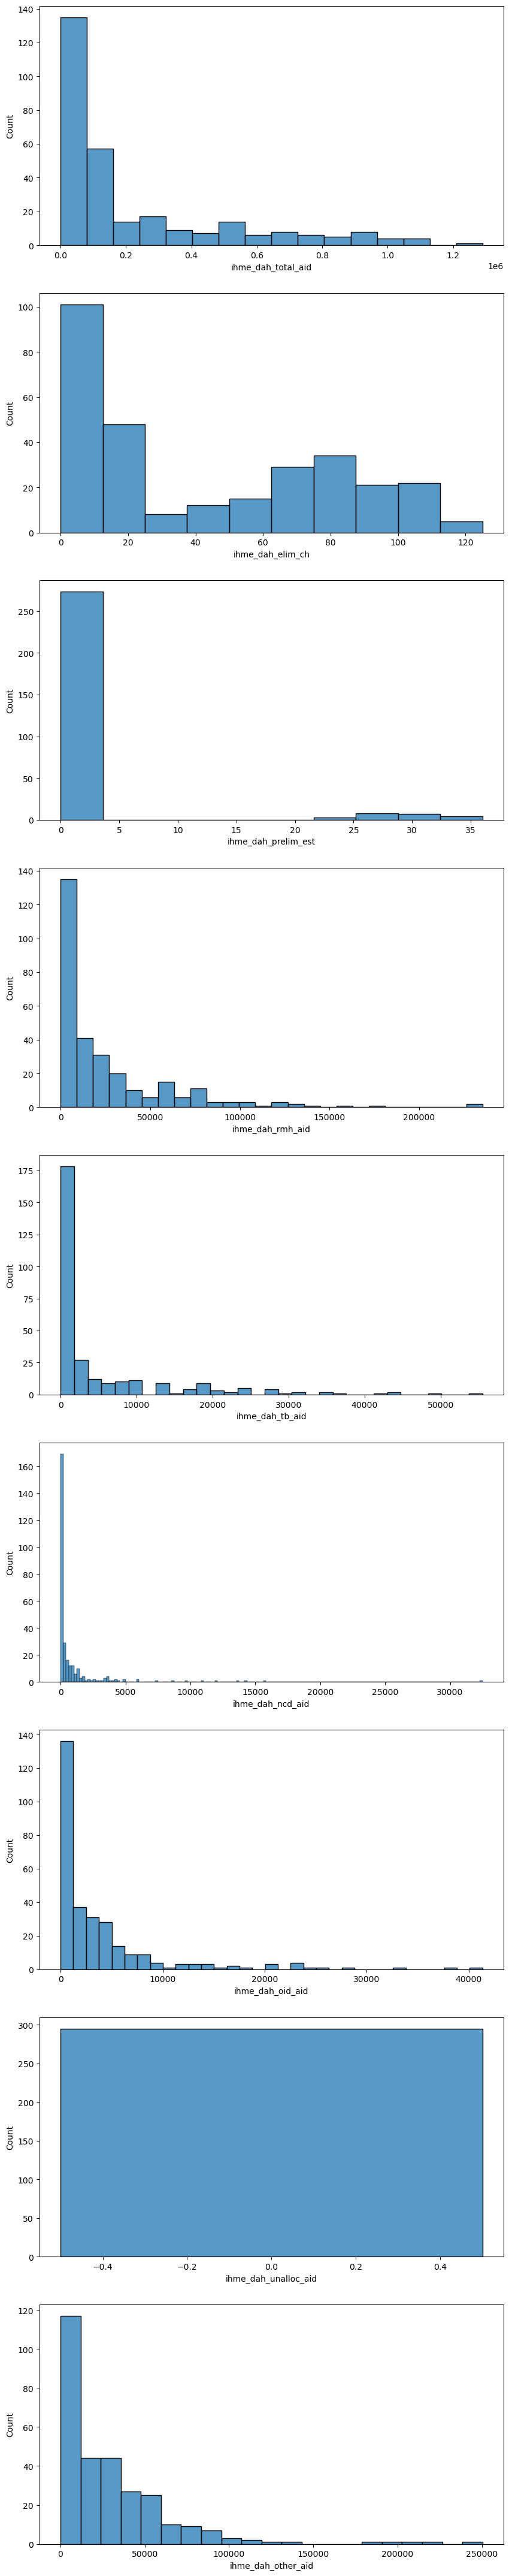

In [25]:
#create histograms for all mean variables
figure, axes = plt.subplots(9,1,figsize=(10,55))
sns.histplot(data_dah['ihme_dah_total_aid'],ax=axes[0])
sns.histplot(data_dah['ihme_dah_elim_ch'],ax=axes[1])
sns.histplot(data_dah['ihme_dah_prelim_est'],ax=axes[2])
sns.histplot(data_dah['ihme_dah_rmh_aid'],ax=axes[3])
sns.histplot(data_dah['ihme_dah_tb_aid'],ax=axes[4])
sns.histplot(data_dah['ihme_dah_ncd_aid'],ax=axes[5])
sns.histplot(data_dah['ihme_dah_oid_aid'],ax=axes[6])
sns.histplot(data_dah['ihme_dah_unalloc_aid'],ax=axes[7])
sns.histplot(data_dah['ihme_dah_other_aid'],ax=axes[8])
plt.savefig('dah1.png')

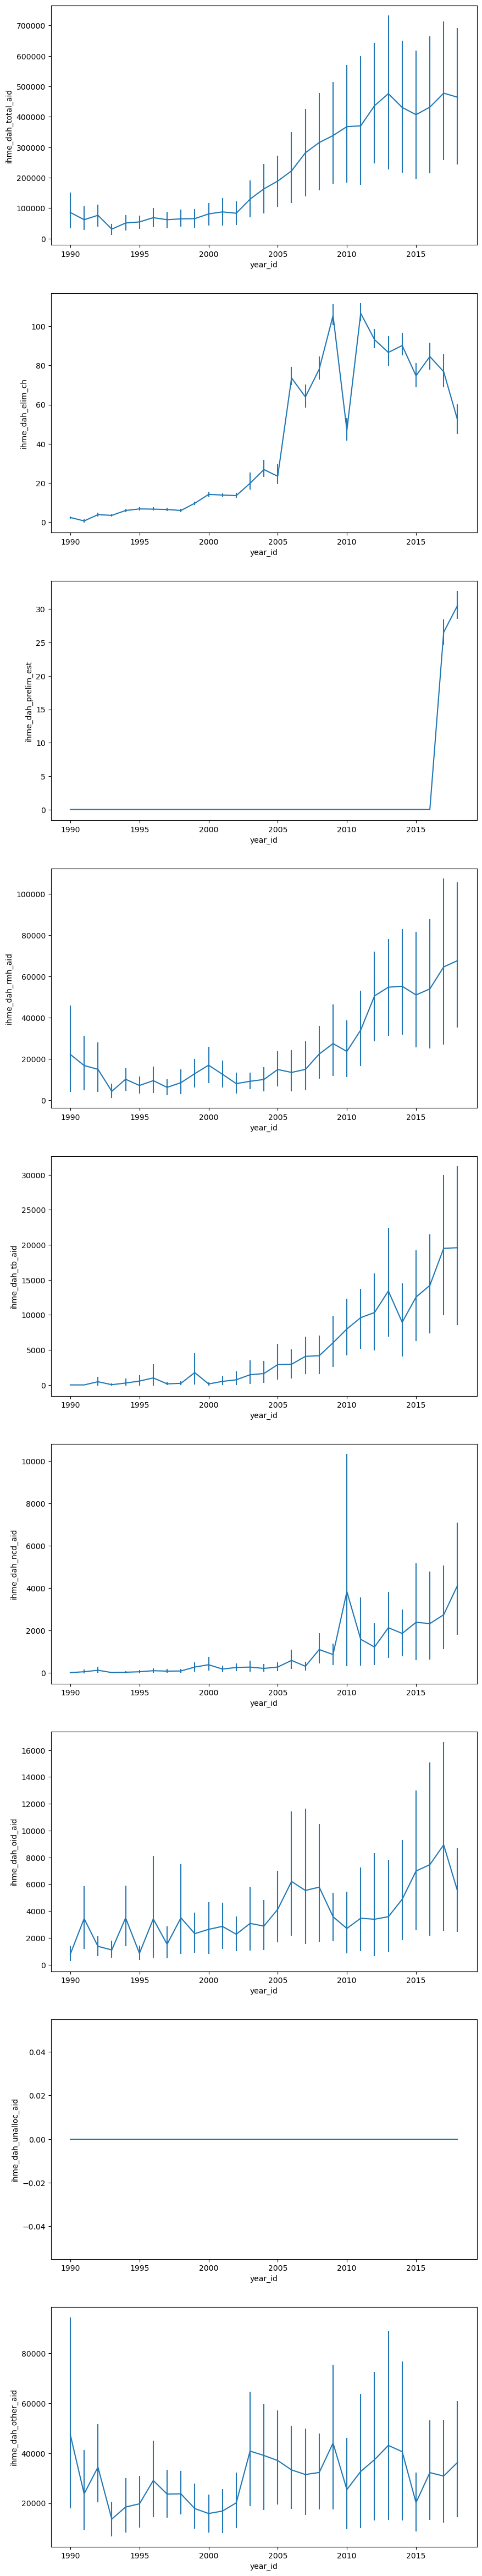

In [26]:
#create trendlines
figure, axes = plt.subplots(9,1,figsize=(10,60))
sns.lineplot(x='year_id',y='ihme_dah_total_aid',data=data_dah,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='ihme_dah_elim_ch',data=data_dah,err_style='bars',ax=axes[1])
sns.lineplot(x='year_id',y='ihme_dah_prelim_est',data=data_dah,err_style='bars',ax=axes[2])
sns.lineplot(x='year_id',y='ihme_dah_rmh_aid',data=data_dah,err_style='bars',ax=axes[3])
sns.lineplot(x='year_id',y='ihme_dah_tb_aid',data=data_dah,err_style='bars',ax=axes[4])
sns.lineplot(x='year_id',y='ihme_dah_ncd_aid',data=data_dah,err_style='bars',ax=axes[5])
sns.lineplot(x='year_id',y='ihme_dah_oid_aid',data=data_dah,err_style='bars',ax=axes[6])
sns.lineplot(x='year_id',y='ihme_dah_unalloc_aid',data=data_dah,err_style='bars',ax=axes[7])
sns.lineplot(x='year_id',y='ihme_dah_other_aid',data=data_dah,err_style='bars',ax=axes[8])

plt.savefig('dah2.png')

In [27]:
data_dah.to_csv('data_dah.csv')

## 3.  WASH, ND-GAIN country indicators

In [28]:
#load data
data_water = pd.read_csv('access_drink.csv')
data_sani = pd.read_csv('access_sani.csv')
display(data_water, data_sani)

,ISO3,Name,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Afghanistan,10.927531,10.927531,10.927531,10.927531,10.927531,10.927531,10.938792,11.725373,...,19.966875,20.818832,21.671018,22.523437,23.376206,24.229208,25.083892,25.940512,26.798956,27.588956
1,ALB,Albania,49.138321,49.138321,49.138321,49.138321,49.138321,49.138321,49.081199,48.984765,...,64.327401,66.380852,68.459832,70.563260,70.591971,70.616508,70.636942,70.653350,70.665854,70.674537
2,DZA,Algeria,70.078517,70.078517,70.078517,70.078517,70.078517,70.078517,70.642182,71.191853,...,75.469921,75.867626,76.250145,75.971789,75.534372,75.068531,74.574965,73.879833,73.139746,72.381456
3,AND,Andorra,90.640001,90.640001,90.640001,90.640001,90.640001,90.640001,90.639999,90.640002,...,90.639998,90.640003,90.639996,90.640001,90.639998,90.639996,90.639999,90.640001,90.640003,90.640003
4,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,VEN,"Venezuela, Bolivarian Republic o",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,VNM,Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,YEM,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,ZMB,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ISO3,Name,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,Albania,40.237416,40.237416,40.237416,40.237416,40.237416,40.237416,40.520895,40.808202,...,44.733594,45.154840,45.561574,45.954062,46.333013,46.698890,47.052290,47.393845,47.577141,47.691082
2,DZA,Algeria,21.514720,21.514720,21.514720,21.514720,21.514720,21.514720,21.351868,21.187954,...,19.677090,19.445413,19.214180,18.983353,18.753132,18.523473,18.294577,18.066395,17.839063,17.612590
3,AND,Andorra,14.604036,14.604036,14.604036,14.604036,14.604036,14.604036,21.788660,28.973285,...,93.634905,100.000004,99.999995,100.000001,99.999998,99.999995,99.999999,100.000001,100.000004,100.000004
4,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,VEN,"Venezuela, Bolivarian Republic o",21.810225,21.810225,21.810225,21.810225,21.810225,21.810225,21.810225,21.810225,...,21.152327,21.365023,21.577719,21.790415,22.003111,22.215806,22.428502,22.641198,22.853894,23.066590
188,VNM,Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,YEM,Yemen,24.771589,24.771589,24.771589,24.771589,24.771589,24.771589,24.890676,25.011545,...,19.724307,19.088029,18.448936,17.806700,17.431739,17.724536,18.011676,18.292967,18.568462,18.837979
190,ZMB,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#stack, filter and rename the columns
##rename
data_water = data_water.rename(columns= {'ISO3':'iso'})
data_sani = data_sani.rename(columns= {'ISO3':'iso'})
##filter the needed columns
data_sani = data_sani.drop(columns=['Name'])
data_water = data_water.drop(columns=['Name'])
##stack the individual year columns
data_water = data_water.melt(id_vars='iso',var_name='year_id',value_name='access_drinkwater_index')
data_sani = data_sani.melt(id_vars='iso',var_name='year_id',value_name='access_sani_index')

In [30]:
display(data_sani.dtypes, data_water.dtypes)
data_water['year_id'] = data_water['year_id'].astype(str).astype(int)
data_sani['year_id'] = data_sani['year_id'].astype(str).astype(int)

iso                   object
year_id               object
access_sani_index    float64
dtype: object

iso                         object
year_id                     object
access_drinkwater_index    float64
dtype: object

In [31]:
data_wash = pd.merge(data_water,data_sani, how="outer", on=["iso", "year_id"])

In [32]:
#create c_ids
from ingester3.scratch import cache_manager
cache_manager()
from ingester3.extensions import *

data_wash = pd.DataFrame.cy.soft_validate_iso_year(data_wash, iso_col='iso', year_col = 'year_id', at_month = 12)
inspect = data_wash.query("valid_id == False")
print('countries with invalid id below')
display(inspect)

data_wash = pd.DataFrame.cy.from_iso_year(data_wash[data_wash['valid_id']==True], iso_col = 'iso', year_col = 'year_id', at_month = 12)
data_wash = data_wash.c.db_id()
#inspect = data_DALY.loc[data_DALY.cy_id.isna()]
print('countries with cy_id na below')
display(inspect)

countries with invalid id below


,iso,year_id,access_drinkwater_index,access_sani_index,valid_id
116,MNE,1995,83.869283,28.139766,False
151,SRB,1995,74.377059,22.767394,False
171,TLS,1995,NaN,NaN,False
308,MNE,1996,83.869283,28.139766,False
343,SRB,1996,74.377059,22.767394,False
363,TLS,1996,NaN,NaN,False
500,MNE,1997,83.869283,28.139766,False
535,SRB,1997,74.377059,22.767394,False
555,TLS,1997,NaN,NaN,False
692,MNE,1998,83.869283,28.139766,False


countries with cy_id na below


,iso,year_id,access_drinkwater_index,access_sani_index,valid_id
116,MNE,1995,83.869283,28.139766,False
151,SRB,1995,74.377059,22.767394,False
171,TLS,1995,NaN,NaN,False
308,MNE,1996,83.869283,28.139766,False
343,SRB,1996,74.377059,22.767394,False
363,TLS,1996,NaN,NaN,False
500,MNE,1997,83.869283,28.139766,False
535,SRB,1997,74.377059,22.767394,False
555,TLS,1997,NaN,NaN,False
692,MNE,1998,83.869283,28.139766,False


In [33]:
#group by country-year & only filter c_ids for Eastern SSa
data_wash = data_wash.query('c_id == 55 or c_id == 56 or c_id ==57 or c_id == 120 and c_id == 155 or c_id == 157 or c_id == 158 or c_id == 159 or c_id == 162 or c_id == 172 or c_id ==191 or c_id ==235 or c_id ==237 or c_id ==246')
data_wash = data_wash.groupby(['c_id','year_id']).sum().reset_index()
display(data_wash)

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_864/3702523228.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_wash = data_wash.groupby(['c_id','year_id']).sum().reset_index()


,c_id,year_id,access_drinkwater_index,access_sani_index,valid_id
0,55,1995,0.0,24.851214,1
1,55,1996,0.0,24.851214,1
2,55,1997,0.0,24.851214,1
3,55,1998,0.0,24.851214,1
4,55,1999,0.0,24.851214,1
...,...,...,...,...,...
255,237,2016,0.0,0.000000,1
256,237,2017,0.0,0.000000,1
257,237,2018,0.0,0.000000,1
258,237,2019,0.0,0.000000,1


In [34]:
#test for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_wash.columns:
    pct_missing= np.mean(data_wash[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,c_id,0.0
1,year_id,0.0
2,access_drinkwater_index,0.0
3,access_sani_index,0.0
4,valid_id,0.0


In [35]:
custom_describe(data_wash)

,c_id,year_id,access_drinkwater_index,access_sani_index,valid_id
nullcounts,0.0,0.0,0.000000,0.000000,0.0
sum,37648.0,521950.0,1538.790667,1775.763746,260.0
mean,144.8,2007.5,5.918426,6.829861,1.0
median,158.5,2007.5,0.000000,0.000000,1.0
max,237.0,2020.0,33.240516,37.080016,1.0


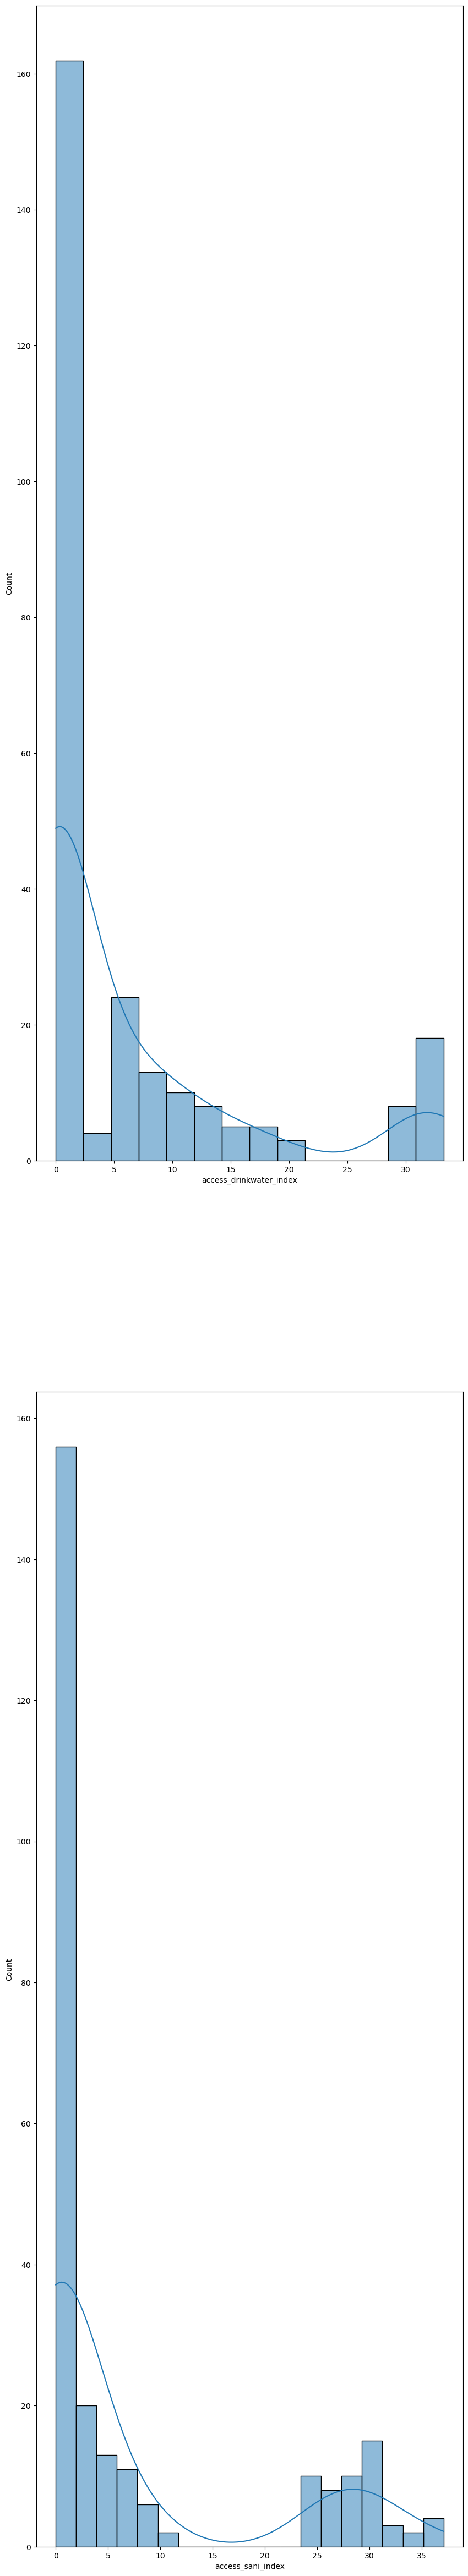

In [36]:
figure, axes = plt.subplots(2,1,figsize=(10,60))
sns.histplot(data_wash['access_drinkwater_index'],kde = True,ax=axes[0])
sns.histplot(data_wash['access_sani_index'],kde = True,ax=axes[1])

plt.savefig('wash1.png')

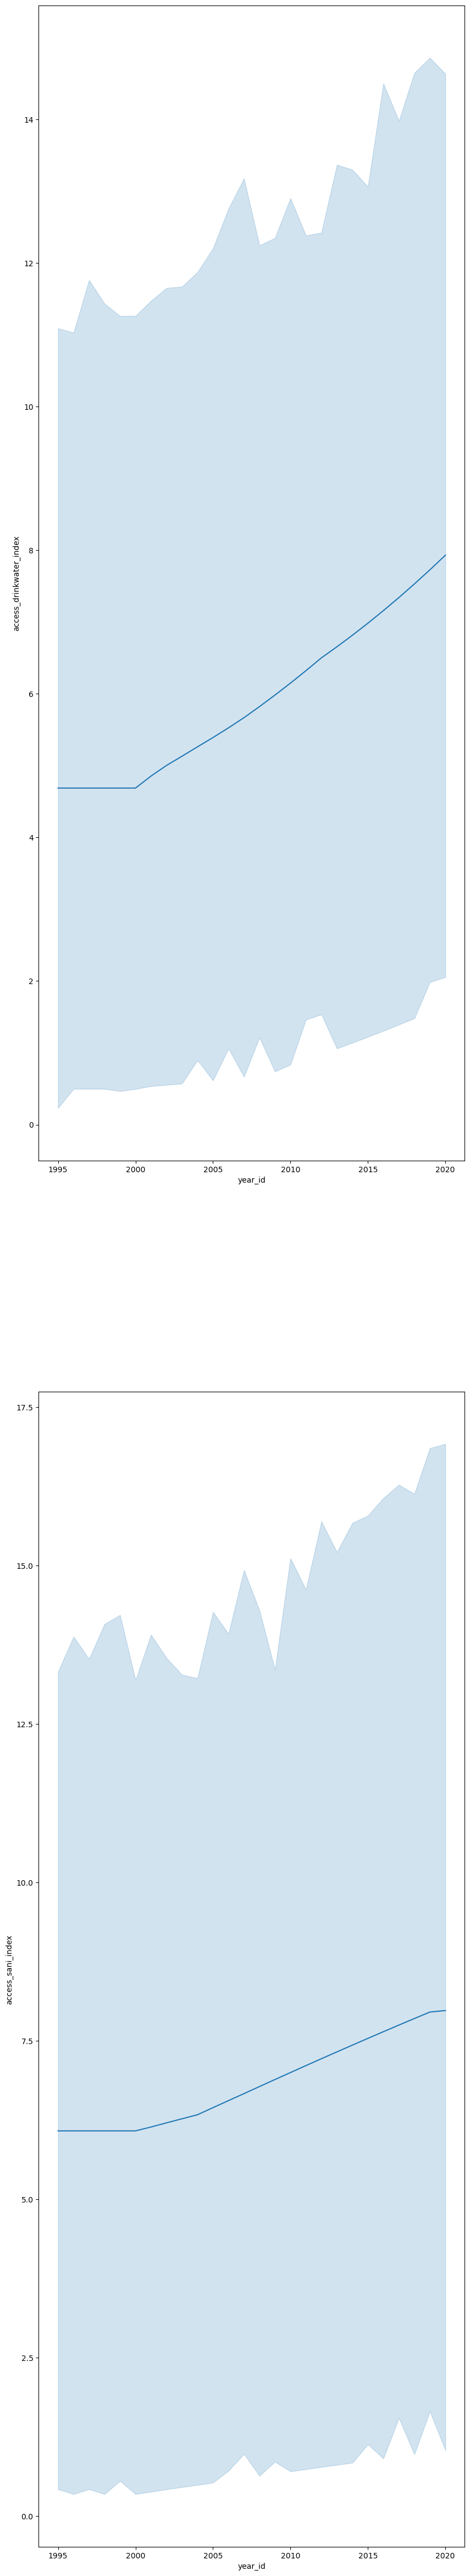

In [37]:
#create trendlines
figure, axes = plt.subplots(2,1,figsize=(10,60))
sns.lineplot(x='year_id',y='access_drinkwater_index',data=data_wash,ax=axes[0])
sns.lineplot(x='year_id',y='access_sani_index',data=data_wash,ax=axes[1])

plt.savefig('wash2.png')

In [38]:
data_wash.to_csv('data_wash.csv')

## 4. Exposure and Vulnerability

In [39]:
def report(df):
    print()
    print(f"A dataset with {len(df.columns)} columns, with "
          f"data between t {min(df.index.get_level_values(0))} "
          f"and {max(df.index.get_level_values(0))}. "
          f"({len(np.unique(df.index.get_level_values(1)))} units)"
          )
    return

In [40]:
#look if the data is already in the views system
!viewser tables list


  > Tables
  ---------------------------------------------------------------------------------------
  | name                                    | path                                    |
  |:----------------------------------------|:----------------------------------------|
  | values_actor_pgm_actor_qlag2_tlag24     | values_actor_pgm_actor_qlag2_tlag24     |
  | values_actor_pgm_actor                  | values_actor_pgm_actor                  |
  | values_actor_pgm_actor_qlag1            | values_actor_pgm_actor_qlag1            |
  | values_actor_pgm_actor_qlag1_persistent | values_actor_pgm_actor_qlag1_persistent |
  | values_actor_pgm_actor_qlag1_tlag24     | values_actor_pgm_actor_qlag1_tlag24     |
  | values_actor_pgm_actor_qlag1_tlag6      | values_actor_pgm_actor_qlag1_tlag6      |
  | values_actor_pgm_actor_qlag2_persistent | values_actor_pgm_actor_qlag2_persistent |
  | values_actor_pgm_actor_persistent       | values_actor_pgm_actor_persistent       |
  | vdem_v12_healt

In [41]:
!viewser tables show gdis_pgy


  > Gdis_pgy
  -------------------------------------------------------------------------------
  | name                                | path                                |
  |:------------------------------------|:------------------------------------|
  | priogrid_year_id                    | priogrid_year_id                    |
  | gids_disastertype_join              | gids_disastertype_join              |
  | gids_total_deaths_mean              | gids_total_deaths_mean              |
  | gids_total_affected_mean            | gids_total_affected_mean            |
  | gids_no_injured_mean                | gids_no_injured_mean                |
  | gids_disasterno_nunique             | gids_disasterno_nunique             |
  | gids_disasterno_count               | gids_disasterno_count               |
  | gids_distype_drought_sum            | gids_distype_drought_sum            |
  | gids_distype_earthquake_sum         | gids_distype_earthquake_sum         |
  | gids_distype_extreme

In [42]:
#define the preliminers t (1990 till 2019) and c_ids
#transform pgy into cy
data_disaster = (Queryset("gdis_pgy", "priogrid_year")
                 .with_column(Column("gdis_count", from_table="gdis_pgy", from_column="gids_disasterno_count"))
                 .with_column(Column("gdis_nunique", from_table="gdis_pgy", from_column="gids_disasterno_nunique"))
                 .with_column(Column("gdis_type", from_table="gdis_pgy", from_column="gids_disastertype_join")))

data_disaster = data_disaster.publish().fetch()

data_disaster

 .    

gdis_count  gdis_nunique gdis_type
year_id priogrid_gid                                    
1980    49182                0.0           0.0          
        49183                0.0           0.0          
        49184                0.0           0.0          
        49185                0.0           0.0          
        49186                0.0           0.0          
...                          ...           ...       ...
2050    249340               NaN           NaN      None
        249341               NaN           NaN      None
        249342               NaN           NaN      None
        249343               NaN           NaN      None
        249344               NaN           NaN      None

[4602078 rows x 3 columns]

In [43]:
data_disaster= data_disaster.reset_index()
data_disaster = data_disaster.rename(columns={'priogrid_gid':'pg_id'})
data_disaster = data_disaster[data_disaster['year_id'] <=2019]
data_disaster

,year_id,pg_id,gdis_count,gdis_nunique,gdis_type
0,1980,49182,0.0,0.0,
1,1980,49183,0.0,0.0,
2,1980,49184,0.0,0.0,
3,1980,49185,0.0,0.0,
4,1980,49186,0.0,0.0,
...,...,...,...,...,...
2592715,2019,249340,NaN,NaN,None
2592716,2019,249341,NaN,NaN,None
2592717,2019,249342,NaN,NaN,None
2592718,2019,249343,NaN,NaN,None


In [ ]:
# Look how easy it is to convert a PGY df to a CY dataframe. Ready for aggregation!
data_disaster['c_id'] = data_disaster.pgy.c_id
data_disaster

In [ ]:
report(data_disaster)

In [ ]:
data_disaster = data_disaster.query('c_id == 55 or c_id == 56 or c_id ==57 or c_id == 120 and c_id == 155 or c_id == 157 or c_id == 158 or c_id == 159 or c_id == 162 or c_id == 172 or c_id ==191 or c_id ==235 or c_id ==237 or c_id ==246')

In [ ]:
#example distribution plot with kernel densities
%matplotlib inline 
sns.displot(data_disaster['urban_value'],kde=True,ax=axes[0])
sns.displot(data_disaster['health_xpd_value'],kde=True,ax=axes[1])
sns.displot(data_disaster['pop_dens_value'],kde=True,ax=axes[2])
savefig('data_disaster1.pdf')

In [ ]:
#create trendlines
figure, axes = plt.subplots(3,1,figsize=(10,60))

sns.lineplot(x='year_id',y='urban_value',data=data_wdi,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='health_xpd_value',data=data_wdi,err_style='bars',ax=axes[1])
sns.lineplot(x='year_id',y='pop_dens_value',data=data_wdi,err_style='bars',ax=axes[2])
savefig('data_disaster2.pdf')

In [ ]:
data_disaster.to_csv('data_disaster.csv')

# emdat data for vulnerability

In [ ]:
!viewser tables show emdat_cy

In [ ]:
data_vn = (Queryset("emdat_cy", "country_year")
                 .with_column(Column("emdat_totl_vn", from_table="emdat_cy", from_column="tot_affected_sum"))
                 .with_column(Column("emdat_totl_dead", from_table="emdat_cy", from_column="tot_death"))
                 .with_column(Column("emdat_totl_injury", from_table="emdat_cy", from_column="tot_injured")))

data_vn = data_vn.publish().fetch()

data_vn

In [ ]:
report(vn)

In [ ]:
data_dah = data_dah.query('c_id == 55 or c_id == 56 or c_id ==57 or c_id == 120 and c_id == 155 or c_id == 157 or c_id == 158 or c_id == 159 or c_id == 162 or c_id == 172 or c_id ==191 or c_id ==235 or c_id ==237 or c_id ==246')

In [ ]:
#example distribution plot with kernel densities
%matplotlib inline 
figure, axes = plt.subplots(3,1,figsize=(10,60))

sns.displot(data_vn['emdat_totl_vn'], kde=True, ax= axes[0])
sns.displot(data_vn['emdat_totl_dead'], kde=True, ax= axes[1])
sns.displot(data_vn['emdat_totl_injury'], kde=True, ax= axes[2])
safefig('emdat1.pdf')

In [ ]:
#create trendlines
figure, axes = plt.subplots(3,1,figsize=(10,60))

sns.lineplot(x='year_id',y='emdat_totl_vn',data=data_wdi,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='emdat_totl_dead',data=data_wdi,err_style='bars',ax=axes[1])
sns.lineplot(x='year_id',y='emdat_totl_injury',data=data_wdi,err_style='bars',ax=axes[2])
safefig('emdat2.pdf')

In [ ]:
data_vn.to_csv('data_vn.csv')